In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Task1: Background Estimation

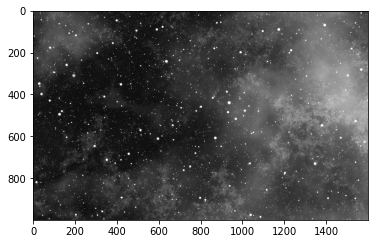

In [3]:
imgI = cv2.imread('Stars.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imgI, 'gray', vmin=0, vmax=255)

In [4]:
# Min-filtered

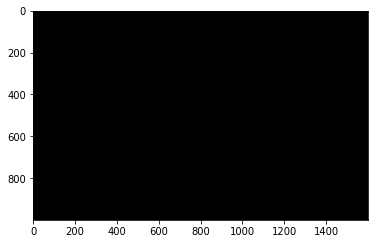

In [5]:
# Step1: generate image A with 0
def generate_0():
    row, col = imgI.shape
    imgA = []
    for i in range(row):
        tmp = []
        for j in range(col):
            tmp.append(0)
        imgA.append(tmp)
    imgA = np.array(imgA)
    return imgA;

imgA = generate_0()
plt.imshow(imgA, 'gray', vmin=0, vmax=255)

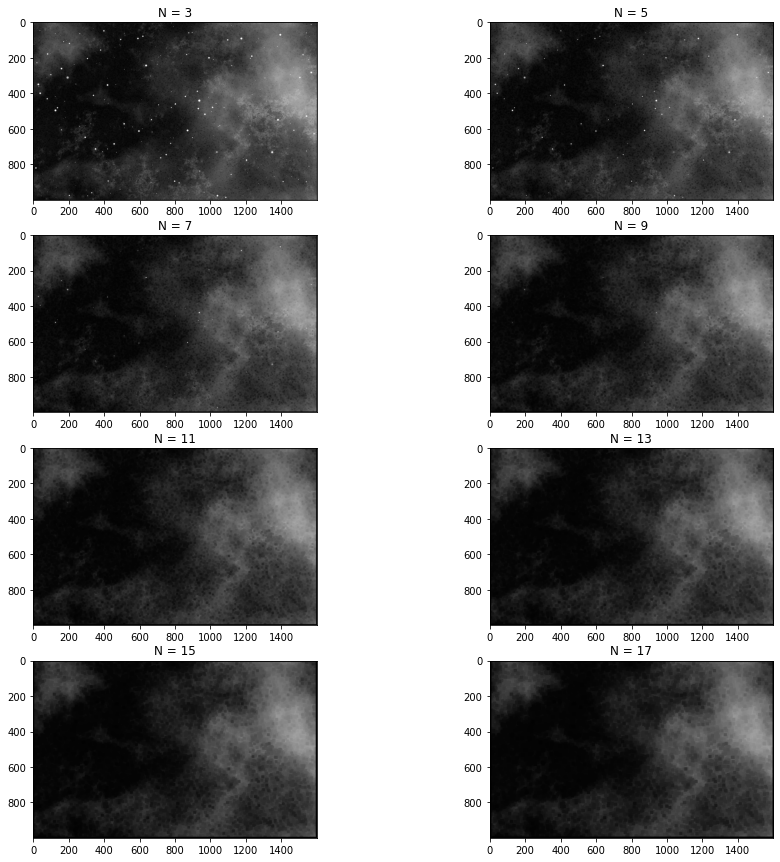

In [6]:
# Step2: 

# fill the boundary of imgI
def fill_img(img, x): 
    row, col = img.shape
    zero = [0] * (col+2*x)
    img_ = []
    for i in range(0, x):
        img_.append(zero)
    for i in range(0, row):
        list_i = []
        for j in range(0, x):
            list_i.append(0)
        for j in range(0, col):
            list_i.append(img[i][j])
        for j in range(0, x):
            list_i.append(0)
        img_.append(list_i)
    for i in range(0, x):
        img_.append(zero)
    img_ = np.array(img_)
    return img_

#find the minimum gray value in a neighbourhood
def min_gray(x, y, k, img):
    Min = 99999
    for i in range(x-k, x+k+1):
        for j in range(y-k, y+k+1):
            if i != j:
                Min = min(Min, img[i][j])
    return Min

def transfer_img_min(img, k):
    row, col = imgA.shape
    for i in range(row):
        for j in range(col):
            imgA[i][j] = min_gray(i+k, j+k, k, img)

i = 1
fig = plt.figure(figsize=(15,15))
while i <= 8:
    img_ = fill_img(imgI, i)
    transfer_img_min(img_, i)
    ax = fig.add_subplot(4, 2, i)
    ax.set_title('N = ' + str(2*i+1))
    ax.imshow(imgA, 'gray', vmin=0, vmax=255)
    name = 'blackA_N=' + str(2*i+1) + ".png"
    cv2.imwrite(name, imgA)
    i += 1
    
# N = 9

In [7]:
# Max-filtered

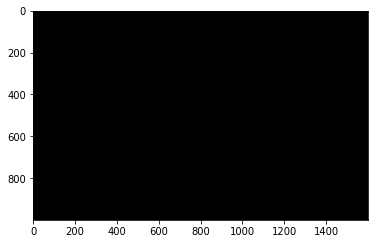

In [8]:
# Step1: generate image B with 0
def generate_0():
    row, col = imgI.shape
    imgB = []
    for i in range(row):
        tmp = []
        for j in range(col):
            tmp.append(0)
        imgB.append(tmp)
    imgB = np.array(imgB)
    return imgB;

imgB = generate_0()
plt.imshow(imgB, 'gray', vmin=0, vmax=255)

True

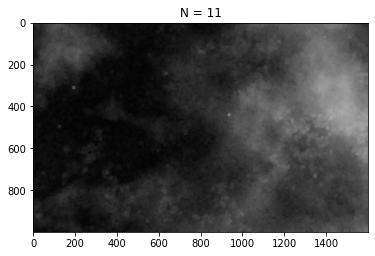

In [9]:
# Step2: 

#find the maximum gray value in a neighbourhood
def max_gray(x, y, k, img):
    Max = -1
    for i in range(x-k, x+k+1):
        for j in range(y-k, y+k+1):
            if i != j:
                Max = max(Max, img[i][j])
    return Max

def transfer_img_max(img, k):
    row, col = imgB.shape
    for i in range(row):
        for j in range(col):
            imgB[i][j] = max_gray(i+k, j+k, k, img)

# choose N = 11(i = 5, N = 2*i+1)
i = 5
img_ = fill_img(imgI, i)
transfer_img_min(img_, i)
img_ = fill_img(imgA, i)
transfer_img_max(img_, i)
plt.title('N = ' + str(2*i+1))
plt.imshow(imgB, 'gray', vmin=0, vmax=255)
name = 'blackB_N=' + str(2*i+1) + ".png"
cv2.imwrite(name, imgB)

In [10]:
 # Task2: Background Subtraction

True

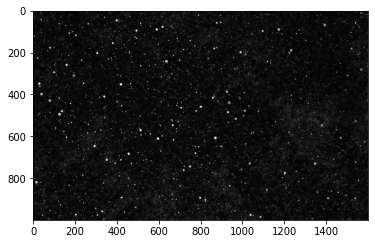

In [11]:
# subtraction
row, col = imgI.shape
imgO = []
for i in range(row):
    tmp = []
    for j in range(col):
        x = imgI[i][j] - imgB[i][j]
        if x < 0:
            x = 0
        tmp.append(x)
    imgO.append(tmp)
imgO = np.array(imgO)
plt.imshow(imgO, 'gray', vmin=0, vmax=255)
name = 'blackO_N=' + str(11) + ".png"
cv2.imwrite(name, imgO)
    

In [12]:
# Task 3: Algorithm Extensions

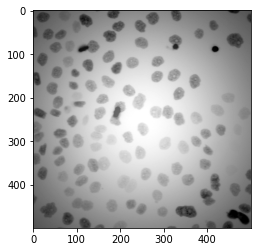

In [13]:
imgI = cv2.imread('Nuclei.png', cv2.IMREAD_GRAYSCALE)
row, col = imgI.shape
plt.imshow(imgI, 'gray', vmin=0, vmax=255)

In [14]:
# generate imgA and imgB with 0
def generate_0():
    row, col = imgI.shape
    img = []
    for i in range(row):
        tmp = []
        for j in range(col):
            tmp.append(0)
        img.append(tmp)
    img = np.array(img)
    return img;
def generate_255():
    row, col = imgI.shape
    img = []
    for i in range(row):
        tmp = []
        for j in range(col):
            tmp.append(255)
        img.append(tmp)
    img = np.array(img)
    return img;

In [15]:
# fill the boundary of image
def fill_img(img, x): 
    row, col = img.shape
    zero = [255] * (col+2*x)
    img_ = []
    for i in range(0, x):
        img_.append(zero)
    for i in range(0, row):
        list_i = []
        for j in range(0, x):
            list_i.append(255)
        for j in range(0, col):
            list_i.append(img[i][j])
        for j in range(0, x):
            list_i.append(255)
        img_.append(list_i)
    for i in range(0, x):
        img_.append(zero)
    img_ = np.array(img_)
    return img_

In [16]:
#find the minimum gray value in a neighbourhood
def min_gray(x, y, k, img):
    Min = 99999
    for i in range(x-k, x+k+1):
        for j in range(y-k, y+k+1):
            if i != j:
                Min = min(Min, img[i][j])
    return Min

#find the maximum gray value in a neighbourhood
def max_gray(x, y, k, img):
    Max = -9999
    for i in range(x-k, x+k+1):
        for j in range(y-k, y+k+1):
            if i != j:
                Max = max(Max, img[i][j])
    return Max

In [17]:
# generate min-filtered image
def transfer_img_min(img, k):
    img_ = generate_255()
    row, col = imgI.shape
    for i in range(row):
        for j in range(col):
            img_[i][j] = min_gray(i+k, j+k, k, img)
    return img_
            
# generate max-filtered image            
def transfer_img_max(img, k):
    img_ = generate_255()
    row, col = imgI.shape
    for i in range(row):
        for j in range(col):
            img_[i][j] = max_gray(i+k, j+k, k, img)
    return img_


In [18]:
# background subtraction
def subtraction_0(img, img_):
    row, col = img.shape
    imgO = []
    for i in range(row):
        tmp = []
        for j in range(col):
            x = img[i][j] - img_[i][j]
            if x < 0:
                x = 0
            tmp.append(x)
        imgO.append(tmp)
    imgO = np.array(imgO)
    return imgO
def subtraction_1(img, img_):
    row, col = img.shape
    imgO = []
    for i in range(row):
        tmp = []
        for j in range(col):
            x = img[i][j] - img_[i][j] + 255
            if x < 0:
                x = 0
            tmp.append(x)
        imgO.append(tmp)
    imgO = np.array(imgO)
    return imgO

In [19]:
def background_estimate(M, imgI, N):
    if M == 0:
        i = (N-1) / 2
        i = int(i)
        imgI_ = fill_img(imgI, i)
        imgA = transfer_img_min(imgI_, i)
#         plt.imshow(imgA, 'gray', vmin=0, vmax=255)
        imgA_ = fill_img(imgA, i)
        imgB = transfer_img_max(imgA_, i)
#         plt.imshow(imgB, 'gray', vmin=0, vmax=255)
        name = 'whiteB_N=' + str(N) + ".png"
        cv2.imwrite(name, imgB)
        imgO = subtraction_0(imgI, imgB)
        plt.title('N = ' + str(2*i+1))
        plt.imshow(imgO, 'gray', vmin=0, vmax=255)
        name = 'white_N=' + str(N) + ".png"
        cv2.imwrite(name, imgO)
    else:
        i = (N-1) / 2
        i = int(i)
        imgI_ = fill_img(imgI, i)
        imgB = transfer_img_max(imgI_, i)
#         plt.imshow(imgB, 'gray', vmin=0, vmax=255)
        imgB_ = fill_img(imgB, i)
        imgA = transfer_img_min(imgB_, i)
        name = 'whiteA_N=' + str(N) + ".png"
        cv2.imwrite(name, imgA)
#         plt.imshow(imgA, 'gray', vmin=0, vmax=255)
        imgO = subtraction_1(imgI, imgA)
        plt.title('N = ' + str(2*i+1))
        plt.imshow(imgO, 'gray', vmin=0, vmax=255)
        name = 'whiteO_N=' + str(N) + ".png"
        cv2.imwrite(name, imgO)

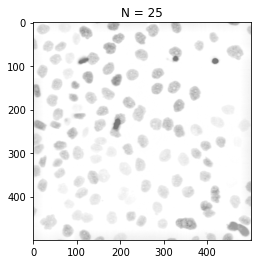

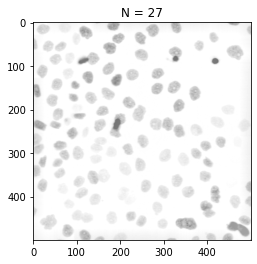

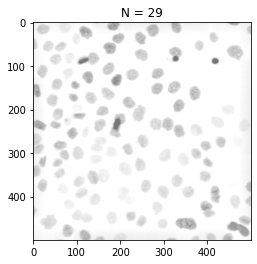

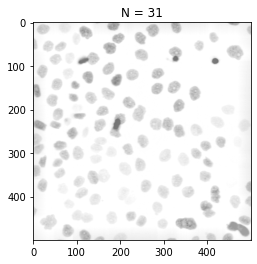

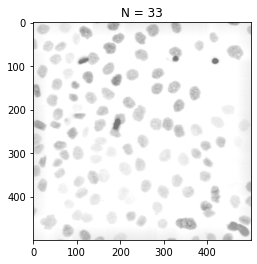

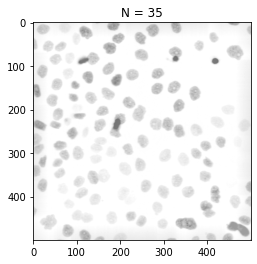

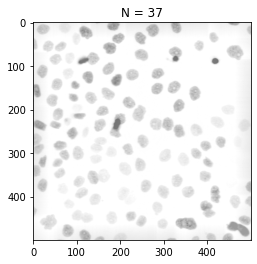

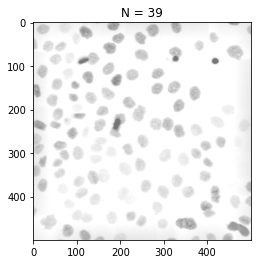

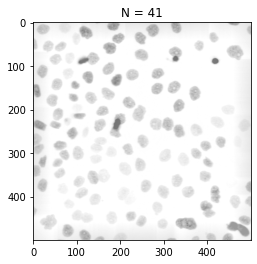

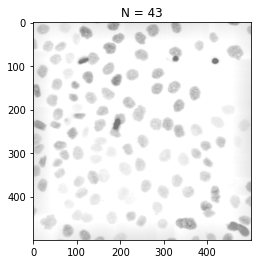

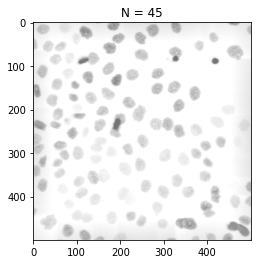

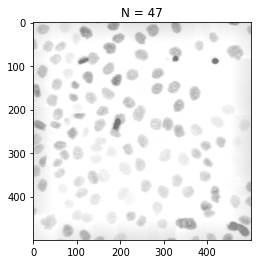

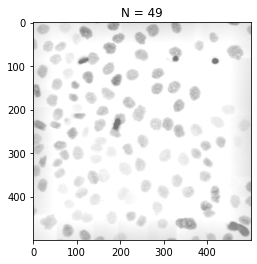

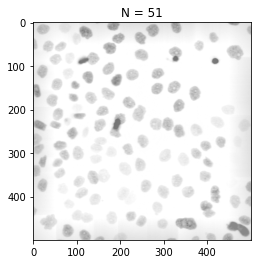

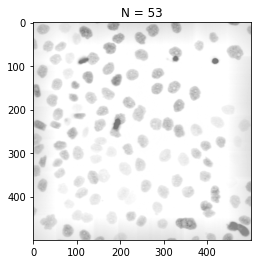

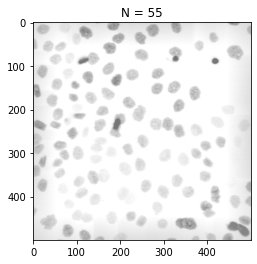

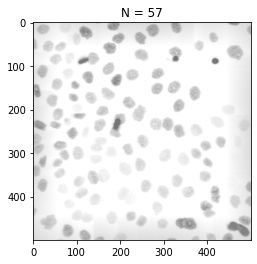

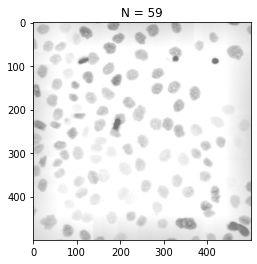

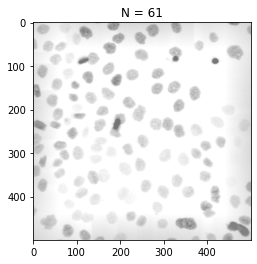

In [22]:
i = 12
while i <= 30:
    n = 2*i+1
    plt.figure(i)
    background_estimate(1, imgI, n)
    i += 1